In [ ]:
# Matt Garlock
# Retail Sales Forecast Project
# 2/20/25

In [1]:
import pandas as pd
import numpy as np

# Load datasets
df_sales = pd.read_csv('/Users/mattgarlock/Downloads/train-2.csv', parse_dates=['date'])
df_stores = pd.read_csv('/Users/mattgarlock/Downloads/stores.csv')
df_oil = pd.read_csv('/Users/mattgarlock/Downloads/oil.csv', parse_dates=['date'])
df_holidays = pd.read_csv('/Users/mattgarlock/Downloads/holidays_events.csv', parse_dates=['date'])

# Print available columns to debug missing column issue
print("Columns in df_holidays:", df_holidays.columns.tolist())

def preprocess_data(df_sales, df_stores, df_oil, df_holidays):
    # Merge store metadata
    df = df_sales.merge(df_stores, on='store_nbr', how='left')
    
    # Merge oil prices
    df = df.merge(df_oil, on='date', how='left')
    
    # Identify holidays using the 'type' column
    if 'type' in df_holidays.columns:
        df_holidays['is_holiday'] = df_holidays['type'].isin(['Holiday', 'Additional', 'Bridge'])
        df_holidays = df_holidays[['date', 'is_holiday']].drop_duplicates()
        df = df.merge(df_holidays, on='date', how='left')
        df['is_holiday'] = df['is_holiday'].fillna(0).astype(int)
    else:
        print("Warning: 'type' column not found in df_holidays. Skipping holiday merge.")
        df['is_holiday'] = 0
    
    # Fill missing oil prices with previous values
    if 'dcoilwtico' in df.columns:
        df['oil_price'] = df['dcoilwtico'].ffill()
        df = df.drop(columns=['dcoilwtico'])
    else:
        print("Warning: 'dcoilwtico' column not found in df_oil.")
    
    # Create time-based features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    
    return df

df = preprocess_data(df_sales, df_stores, df_oil, df_holidays)


Columns in df_holidays: ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']


Columns in df_holidays: ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']


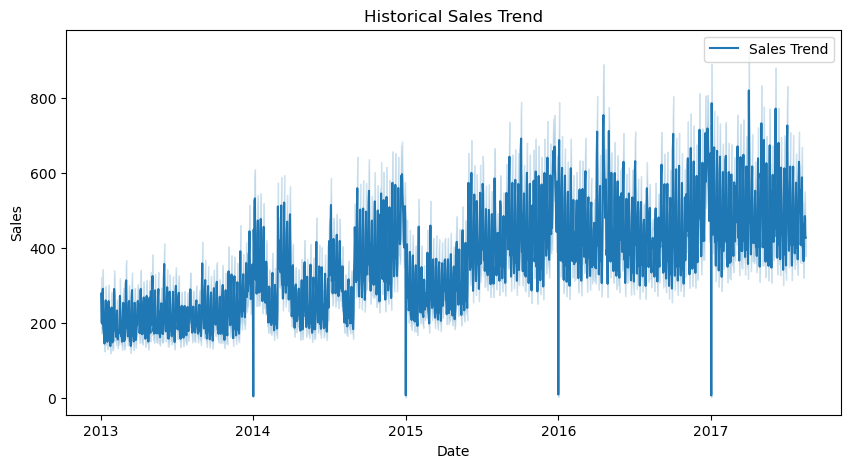

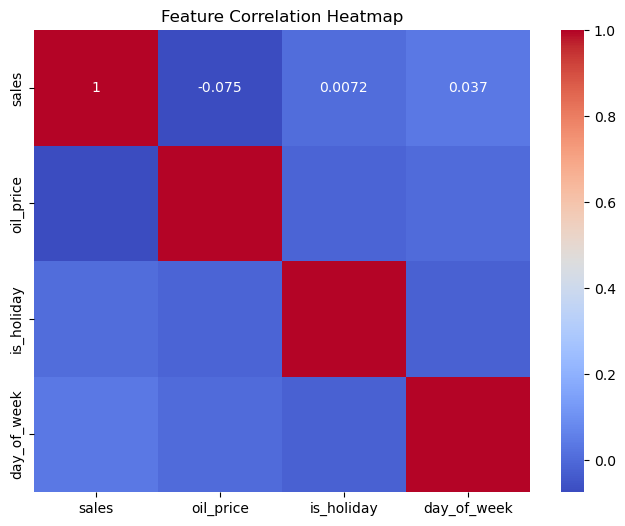

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load datasets
df_sales = pd.read_csv('/Users/mattgarlock/Downloads/train-2.csv', parse_dates=['date'])
df_stores = pd.read_csv('/Users/mattgarlock/Downloads/stores.csv')
df_oil = pd.read_csv('/Users/mattgarlock/Downloads/oil.csv', parse_dates=['date'])
df_holidays = pd.read_csv('/Users/mattgarlock/Downloads/holidays_events.csv', parse_dates=['date'])

# Print available columns to debug missing column issue
print("Columns in df_holidays:", df_holidays.columns.tolist())

def preprocess_data(df_sales, df_stores, df_oil, df_holidays):
    # Merge store metadata
    df = df_sales.merge(df_stores, on='store_nbr', how='left')
    
    # Merge oil prices
    df = df.merge(df_oil, on='date', how='left')
    
    # Identify holidays using the 'type' column
    if 'type' in df_holidays.columns:
        df_holidays['is_holiday'] = df_holidays['type'].isin(['Holiday', 'Additional', 'Bridge'])
        df_holidays = df_holidays[['date', 'is_holiday']].drop_duplicates()
        df = df.merge(df_holidays, on='date', how='left')
        df['is_holiday'] = df['is_holiday'].fillna(0).astype(int)
    else:
        print("Warning: 'type' column not found in df_holidays. Skipping holiday merge.")
        df['is_holiday'] = 0
    
    # Fill missing oil prices with previous values
    if 'dcoilwtico' in df.columns:
        df['oil_price'] = df['dcoilwtico'].ffill()
        df = df.drop(columns=['dcoilwtico'])
    else:
        print("Warning: 'dcoilwtico' column not found in df_oil.")
    
    # Create time-based features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    
    return df

df = preprocess_data(df_sales, df_stores, df_oil, df_holidays)

# Ensure no infinite values exist before plotting
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Exploratory Data Analysis
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['date'], y=df['sales'], label='Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Historical Sales Trend')
plt.legend()
plt.savefig('historical_sales_trend.png')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['sales', 'oil_price', 'is_holiday', 'day_of_week']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.savefig('feature_correlation_heatmap.png')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.3881   
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9794 
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9899 
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3148  
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3315 
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4332 
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7330  
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6974 
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1820 
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2895 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RMSE ARIMA: 3.0805394816838487
RMSE XGBoost: 3.0779747049418344
RMSE LSTM: 2.8419583671609576


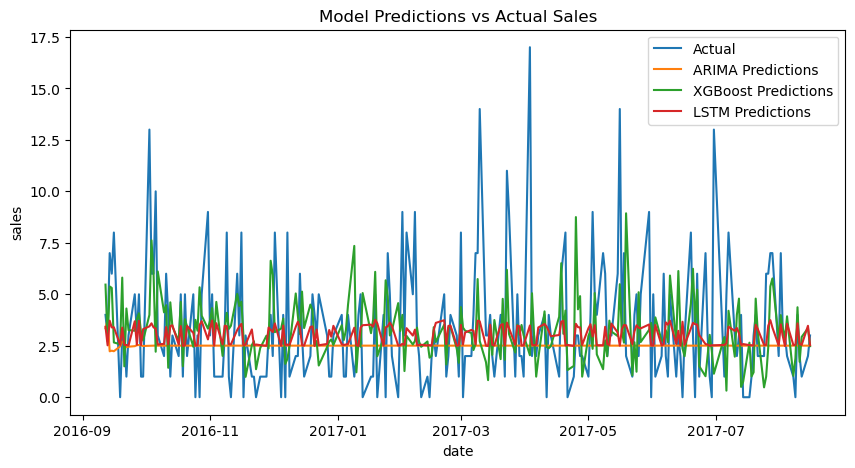

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load datasets
df_sales = pd.read_csv('/Users/mattgarlock/Downloads/train-2.csv', parse_dates=['date'])
df_stores = pd.read_csv('/Users/mattgarlock/Downloads/stores.csv')
df_oil = pd.read_csv('/Users/mattgarlock/Downloads/oil.csv', parse_dates=['date'])
df_holidays = pd.read_csv('/Users/mattgarlock/Downloads/holidays_events.csv', parse_dates=['date'])

def preprocess_data(df_sales, df_stores, df_oil, df_holidays):
    df = df_sales.merge(df_stores, on='store_nbr', how='left')
    df = df.merge(df_oil, on='date', how='left')
    if 'type' in df_holidays.columns:
        df_holidays['is_holiday'] = df_holidays['type'].isin(['Holiday', 'Additional', 'Bridge'])
        df_holidays = df_holidays[['date', 'is_holiday']].drop_duplicates()
        df = df.merge(df_holidays, on='date', how='left')
        df['is_holiday'] = df['is_holiday'].fillna(0).astype(int)
    df['oil_price'] = df['dcoilwtico'].ffill() if 'dcoilwtico' in df.columns else 0
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    return df

df = preprocess_data(df_sales, df_stores, df_oil, df_holidays)
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df = df[~df.index.duplicated(keep='first')]
df = df.asfreq('D')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Split data for training
features = ['store_nbr', 'oil_price', 'is_holiday', 'day_of_week']
X_train, X_test, y_train, y_test = train_test_split(df[features], df['sales'], test_size=0.2, random_state=42)

# ARIMA Model
arima_model = ARIMA(y_train, order=(5,1,0))
arima_fit = arima_model.fit()
y_pred_arima = arima_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Prophet Model
prophet_df = df.reset_index()[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=len(y_test))
forecast = prophet_model.predict(future)

# XGBoost Model
xgb_model = RandomForestRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(np.expand_dims(X_train, axis=2), y_train, epochs=10, batch_size=32)
y_pred_lstm = lstm_model.predict(np.expand_dims(X_test, axis=2))

# Model Evaluation
rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm.flatten()))

print(f"RMSE ARIMA: {rmse_arima}")
print(f"RMSE XGBoost: {rmse_xgb}")
print(f"RMSE LSTM: {rmse_lstm}")

# Visualization
plt.figure(figsize=(10, 5))
sns.lineplot(x=df.index[-len(y_test):], y=y_test, label='Actual')
sns.lineplot(x=df.index[-len(y_test):], y=y_pred_arima, label='ARIMA Predictions')
sns.lineplot(x=df.index[-len(y_test):], y=y_pred_xgb, label='XGBoost Predictions')
sns.lineplot(x=df.index[-len(y_test):], y=y_pred_lstm.flatten(), label='LSTM Predictions')
plt.legend()
plt.title('Model Predictions vs Actual Sales')
plt.savefig('model_predictions_vs_actual_sales.png')
plt.show()
